# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [10]:
!pip install pymongo

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [11]:
!pip install pymongo[srv]

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [12]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [13]:
!pip install tweepy

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [14]:
!pip install twitter

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [15]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [16]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [18]:
client = MongoClient(mongod_connect)
db = client.lab9 
tweet_collection = db.tweet_collection 
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [4]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [5]:
track = ['election'] # define the keywords, tweets contain election

locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [ ]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

## Use the REST API to Collect Tweets

Authorize the REST API 

In [21]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [19]:
count = 100 #number of returned tweets, default and max is 100
#geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [22]:
search_results = rest_api.search.tweets( count=count,q=q) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Wed Nov 03 20:23:32 +0000 2021'
'Wed Nov 03 20:23:30 +0000 2021'
'Wed Nov 03 20:23:29 +0000 2021'
'Wed Nov 03 20:23:29 +0000 2021'
'Wed Nov 03 20:23:28 +0000 2021'
'Wed Nov 03 20:23:28 +0000 2021'
'Wed Nov 03 20:23:27 +0000 2021'
'Wed Nov 03 20:23:27 +0000 2021'
'Wed Nov 03 20:23:27 +0000 2021'
'Wed Nov 03 20:23:26 +0000 2021'
'Wed Nov 03 20:23:26 +0000 2021'
'Wed Nov 03 20:23:25 +0000 2021'
'Wed Nov 03 20:23:25 +0000 2021'
'Wed Nov 03 20:23:25 +0000 2021'
'Wed Nov 03 20:23:24 +0000 2021'
'Wed Nov 03 20:23:22 +0000 2021'
'Wed Nov 03 20:23:22 +0000 2021'
'Wed Nov 03 20:23:21 +0000 2021'
'Wed Nov 03 20:23:21 +0000 2021'
'Wed Nov 03 20:23:21 +0000 2021'
'Wed Nov 03 20:23:21 +0000 2021'
'Wed Nov 03 20:23:19 +0000 2021'
'Wed Nov 03 20:23:19 +0000 2021'
'Wed Nov 03 20:23:18 +0000 2021'
'Wed Nov 03 20:23:18 +0000 2021'
'Wed Nov 03 20:23:18 +0000 2021'
'Wed Nov 03 20:23:18 +0000 2021'
'Wed Nov 03 20:23:18 +0000 2021'
'Wed Nov 03 20:23:18 +0000 2021'
'Wed Nov 03 20:23:17 +0000 2021'
'Wed Nov 0

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [24]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                         max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

TwitterHTTPError: Twitter sent status 429 for URL: 1.1/search/tweets.json using parameters: (count=100&max_id=1455982437876617226&oauth_consumer_key=uHvizo6EmsBOVBzm5Rda1PlrT&oauth_nonce=16270977472589033720&oauth_signature_method=HMAC-SHA1&oauth_timestamp=1635971375&oauth_token=60388598-MNOLnSnLK8ZJwWh2isDw0ojr0NXqc57nmNJ4ML4Z4&oauth_version=1.0&q=covid19&oauth_signature=zWV5%2B90OUf6u%2Bjf48kvckV2Ikbo%3D)
details: {'errors': [{'message': 'Rate limit exceeded', 'code': 88}]}

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [25]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

5642
4963


Create a text index and print the Tweets containing specific keywords. 

In [26]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [27]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid"}}) # return tweets contain vote

Use pprint to display tweets

In [28]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Dr Katie
text: M's sis has #covid19
M's sister's bf has covid
M's auntie has #COVID
M's uncle has #Covid_19
M's cousin has covid… https://t.co/6S0icbu4NS
----
name: Covid-19 Ö-Watch
text: 🇦🇹 Pöltl offenbar im Covid-Prokotoll der NBA https://t.co/bMyVSabVEZ #covid19 #covid #corona
----
name: Covid-19 Ö-Watch
text: 🇦🇹 Basketballer Jakob Pöltl hat ein Covid-Problem https://t.co/RHEUbxp3gB #covid #covid19 #corona
----
name: Covid-19 Ö-Watch
text: 🇦🇹 NBA-Legionär Pöltl ins Covid-Protokoll aufgenommen https://t.co/20ILkg5kiC #covid19 #corona #covid
----
name: Covid-19 Ö-Watch
text: 🇦🇹 Jakob Pöltl im Covid-Protokoll der NBA? https://t.co/A7ybyL36VJ #covid #covid19 #corona
----
name: Research Square Covid-19 Preprints
text: A Linear Dynamical Perspective on Epidemiology: Interplay Between Early COVID-19 Outbreak and Human Mobility #covid https://t.co/6MA04elppT
----
name: @COVID_Evidence
text: RT @COVID_Evidence: LitCovid:  COVID-19 "Green Pass": a Lesson on the Proportionality Prin

In [29]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vaccine"}}) # return tweets contain vote

Use pandas to display tweets

In [30]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,retweet_count,favorite_count,favorited,retweeted,lang,quoted_status_id,quoted_status_id_str,possibly_sensitive,quoted_status,extended_entities
0,6182f0fa1a24690682b1e84f,Wed Nov 03 19:54:25 +0000 2021,1455986742905880579,1455986742905880579,RT @WHO: Available data on vaccination of preg...,False,"{'hashtags': [{'text': 'Covaxin', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,251,0,False,False,en,NaN,NaN,NaN,NaN,NaN
1,6182f0ef1a24690682b1e654,Wed Nov 03 19:59:06 +0000 2021,1455987921916358657,1455987921916358657,RT @WHO: Available data on vaccination of preg...,False,"{'hashtags': [{'text': 'Covaxin', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,251,0,False,False,en,NaN,NaN,NaN,NaN,NaN
2,6182f1221a24690682b1f05f,Wed Nov 03 19:37:25 +0000 2021,1455982464694956033,1455982464694956033,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,585,0,False,False,en,NaN,NaN,NaN,NaN,NaN
3,6182f1211a24690682b1f04a,Wed Nov 03 19:37:37 +0000 2021,1455982516297519106,1455982516297519106,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,585,0,False,False,en,NaN,NaN,NaN,NaN,NaN
4,6182f11f1a24690682b1efcd,Wed Nov 03 19:38:34 +0000 2021,1455982756425617408,1455982756425617408,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,584,0,False,False,en,NaN,NaN,NaN,NaN,NaN
5,6182f11d1a24690682b1ef6c,Wed Nov 03 19:39:19 +0000 2021,1455982944212881409,1455982944212881409,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,584,0,False,False,en,NaN,NaN,NaN,NaN,NaN
6,6182f11c1a24690682b1ef42,Wed Nov 03 19:39:44 +0000 2021,1455983050505007107,1455983050505007107,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,584,0,False,False,en,NaN,NaN,NaN,NaN,NaN
7,6182f1191a24690682b1ee9e,Wed Nov 03 19:41:11 +0000 2021,1455983415711485959,1455983415711485959,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,584,0,False,False,en,NaN,NaN,NaN,NaN,NaN
8,6182f1181a24690682b1ee80,Wed Nov 03 19:41:30 +0000 2021,1455983493217984512,1455983493217984512,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,584,0,False,False,en,NaN,NaN,NaN,NaN,NaN
9,6182f1181a24690682b1ee68,Wed Nov 03 19:41:40 +0000 2021,1455983537572700170,1455983537572700170,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,584,0,False,False,en,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

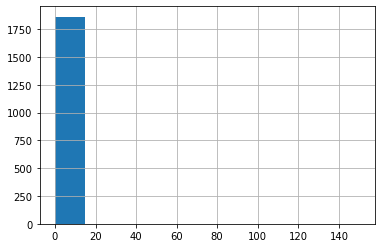

In [31]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count